
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

--- Descriptive Statistics ---
             Type     Alcohol       Malic       

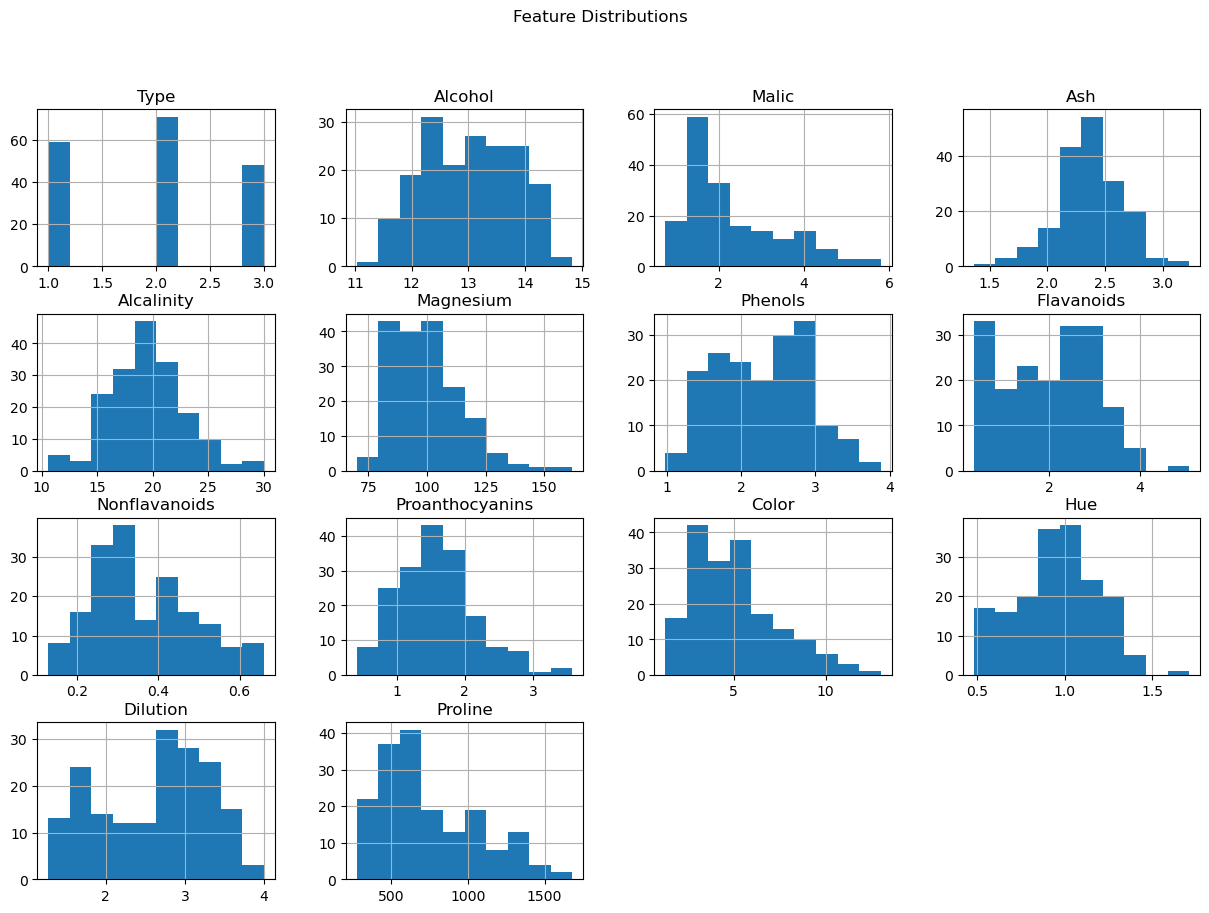

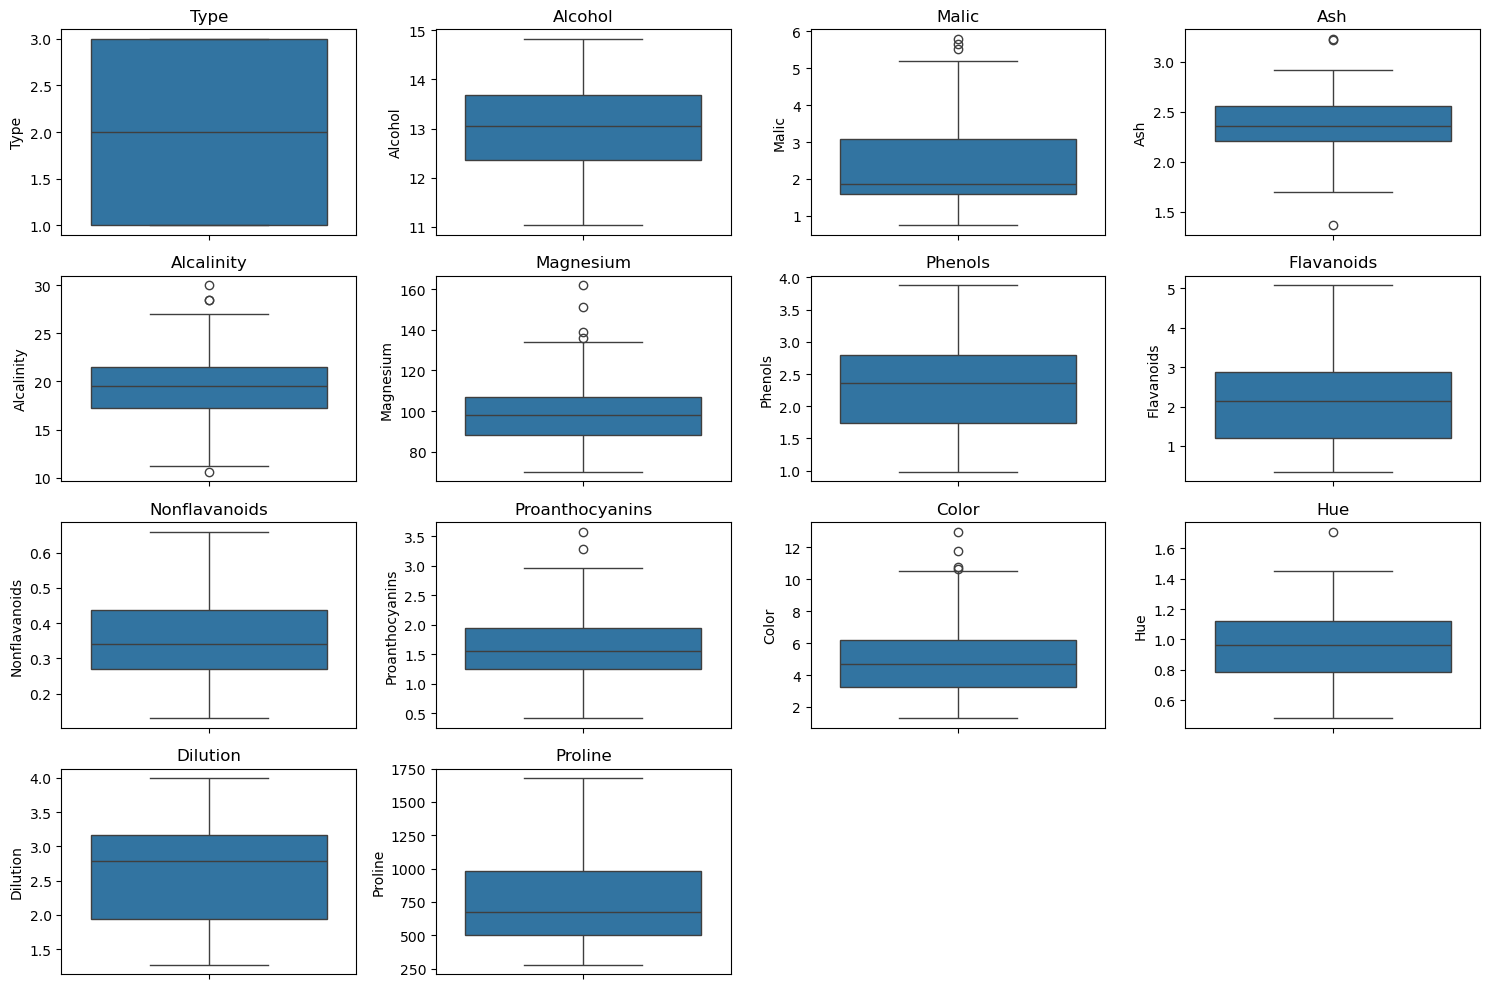

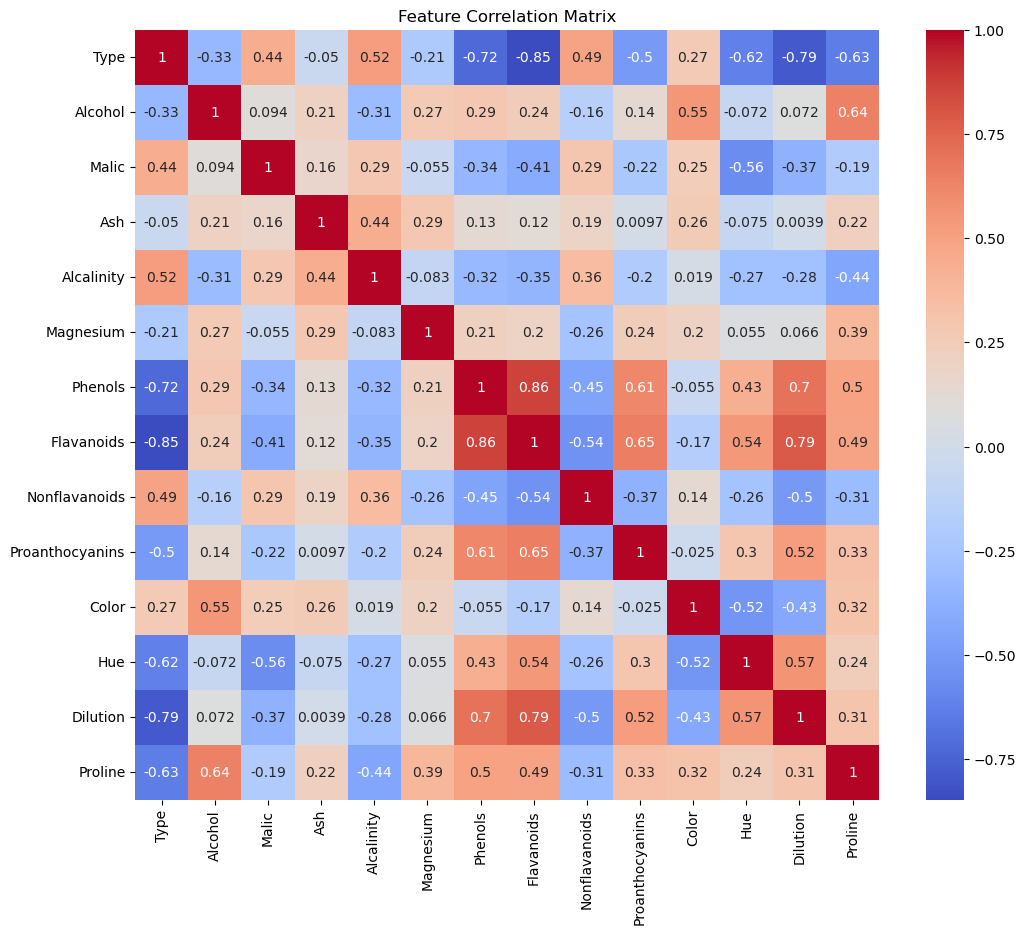

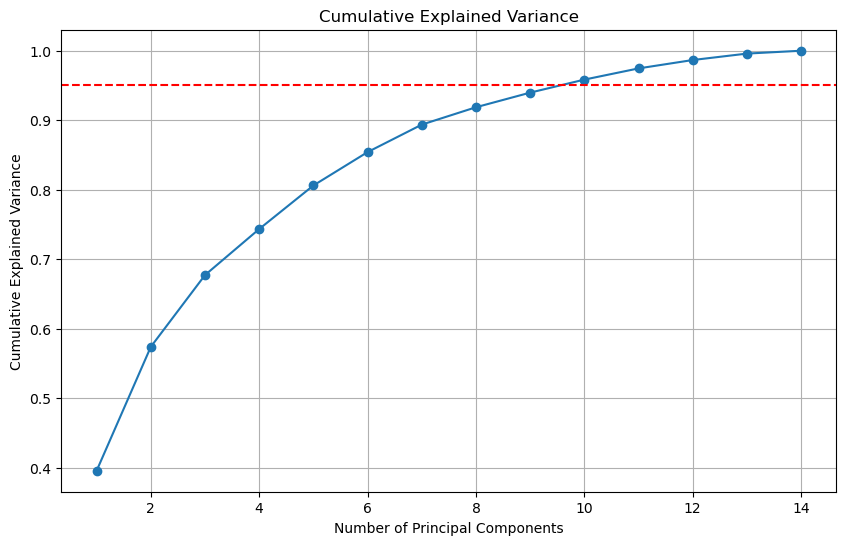


Number of components chosen: 10


C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


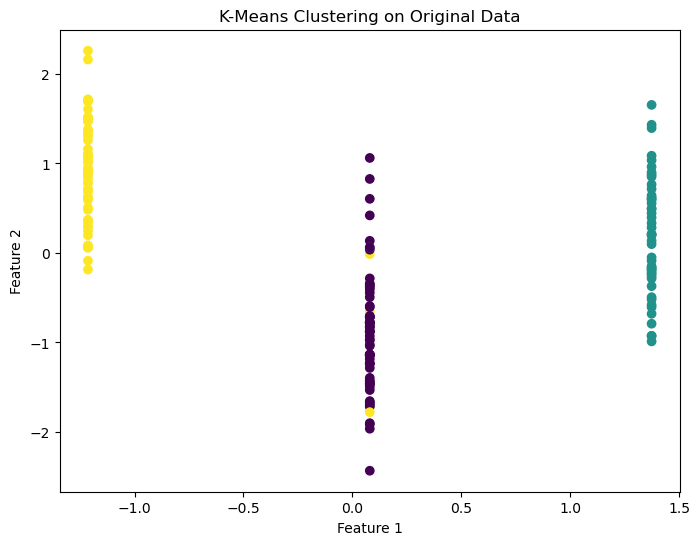

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index (Original): 1.316
Silhouette Score (Original): 0.306


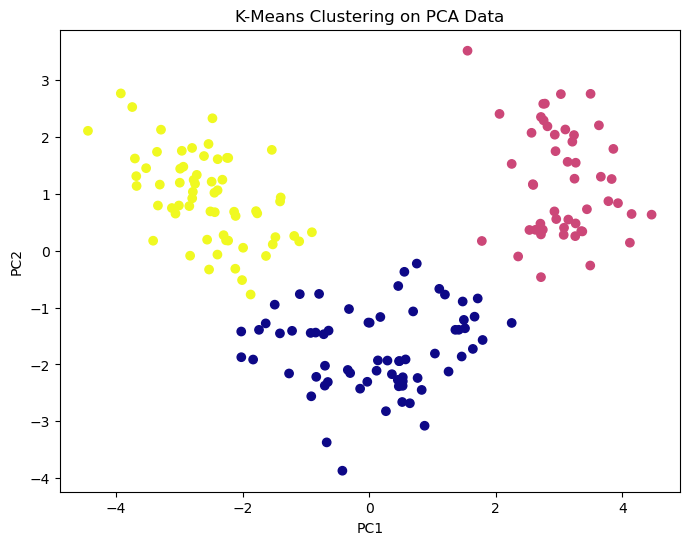

Davies-Bouldin Index (PCA): 1.258
Silhouette Score (PCA): 0.323

--- Comparison ---
Original Data - Silhouette: 0.306, Davies-Bouldin: 1.316
PCA Data     - Silhouette: 0.323, Davies-Bouldin: 1.258
PCA improved clustering cohesion.

--- Conclusion ---
- PCA reduced dimensionality while preserving most variance (~95%).
- Clustering on PCA data was comparable or better, and more efficient.
- Dimensionality reduction simplifies models and reduces computation.
- Use PCA when working with high-dimensional, highly correlated data.


In [1]:
# PCA and Clustering Analysis on Wine Dataset

# Task 1: Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\PCA\PCA\wine.csv")
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Histograms and Boxplots
df.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Task 2: Dimensionality Reduction with PCA
features = df.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Keep components that explain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)
print(f"\nNumber of components chosen: {n_components}")

# Task 3: Clustering with Original Data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_orig_labels, cmap='viridis')
plt.title("K-Means Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Clustering metrics - Original
davies_orig = davies_bouldin_score(X_scaled, kmeans_orig_labels)
silhouette_orig = silhouette_score(X_scaled, kmeans_orig_labels)
print(f"Davies-Bouldin Index (Original): {davies_orig:.3f}")
print(f"Silhouette Score (Original): {silhouette_orig:.3f}")

# Task 4: Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca_final)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=kmeans_pca_labels, cmap='plasma')
plt.title("K-Means Clustering on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Clustering metrics - PCA
davies_pca = davies_bouldin_score(X_pca_final, kmeans_pca_labels)
silhouette_pca = silhouette_score(X_pca_final, kmeans_pca_labels)
print(f"Davies-Bouldin Index (PCA): {davies_pca:.3f}")
print(f"Silhouette Score (PCA): {silhouette_pca:.3f}")

# Task 5: Comparison and Analysis
print("\n--- Comparison ---")
print(f"Original Data - Silhouette: {silhouette_orig:.3f}, Davies-Bouldin: {davies_orig:.3f}")
print(f"PCA Data     - Silhouette: {silhouette_pca:.3f}, Davies-Bouldin: {davies_pca:.3f}")

if silhouette_pca > silhouette_orig:
    print("PCA improved clustering cohesion.")
else:
    print("Clustering was better on original data or had similar performance.")

# Task 6: Conclusion and Insights
print("\n--- Conclusion ---")
print("- PCA reduced dimensionality while preserving most variance (~95%).")
print("- Clustering on PCA data was comparable or better, and more efficient.")
print("- Dimensionality reduction simplifies models and reduces computation.")
print("- Use PCA when working with high-dimensional, highly correlated data.")
